# Dataset Generation

This code is used to create the dataset that consists of adjacency_matrix, structuring_element and opening graph

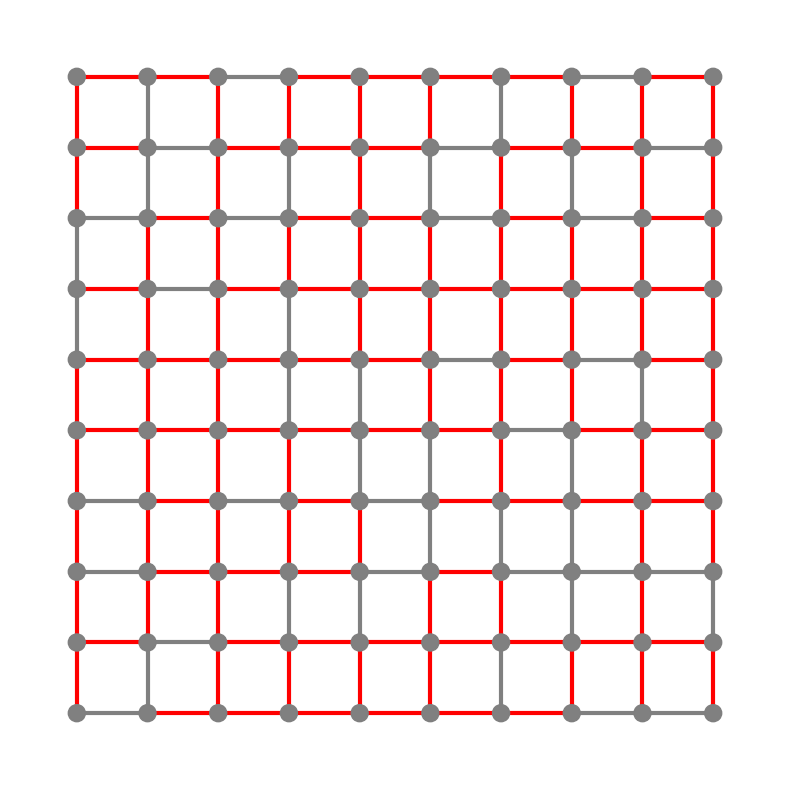

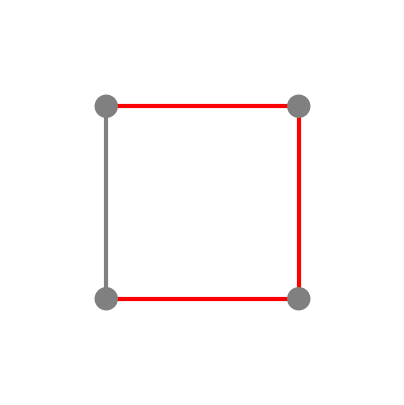

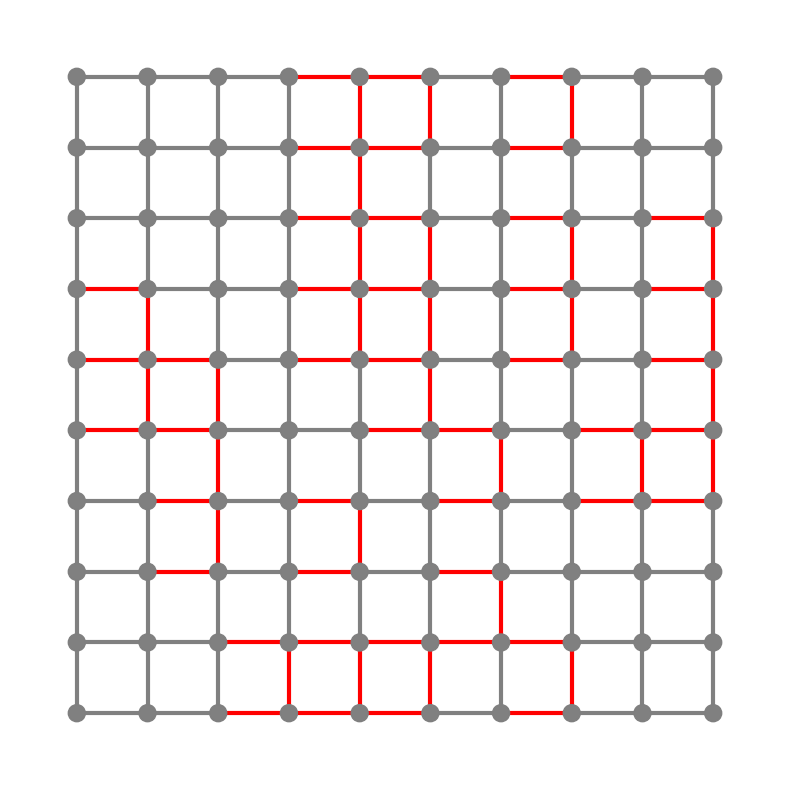

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os

adj_foldername = "updated_dataset_5000/adjacency_matrix"
str_foldername = "updated_dataset_5000/structuring_elem"
open_foldername = "updated_dataset_5000/opening_result"

# Create the folder if it doesn't exist
if not os.path.exists(adj_foldername):
    os.makedirs(adj_foldername)
if not os.path.exists(str_foldername):
    os.makedirs(str_foldername)
if not os.path.exists(open_foldername):
    os.makedirs(open_foldername)

#to save 5000 photos 
for file in range(0,1):
    
    n = 10  # Grid size
    # Initialize a grid graph with 100 nodes
    G = nx.grid_2d_graph(n, n)

    # Create a layout for the graph
    pos_adj_b = {(x, y): (x, y) for x, y in G.nodes()}  # Mapping of nodes to positions
    nx.set_node_attributes(G, pos_adj_b, 'pos')  # Set 'pos' attribute for nodes


    # This is done so that both the null grid and G_adj graph have the same node labels
    G = nx.convert_node_labels_to_integers(
        G, ordering='sorted', label_attribute='origin'
    )

    adj_matrix = np.zeros((n*n, n*n), dtype=int)  # Initialize adjacency matrix

    #Random generator for adj_matrix
    while np.sum(adj_matrix) == 0:# Generate at least one edge
        for i in range(n):
            for j in range(n):
                node = i * n + j  # Node index in the adjacency matrix
                # Check neighboring nodes and add edges randomly
                if i > 0 and np.random.rand() < 0.5:
                    adj_matrix[node, node - n] = 1  # Add edge to node above
                if i < n - 1 and np.random.rand() < 0.5:
                    adj_matrix[node, node + n] = 1  # Add edge to node below
                if j > 0 and np.random.rand() < 0.5:
                    adj_matrix[node, node - 1] = 1  # Add edge to node on the left
                if j < n - 1 and np.random.rand() < 0.5:
                    adj_matrix[node, node + 1] = 1  # Add edge to node on the right
                    
    adj_matrix = np.array(adj_matrix)
    # Graph from adjacency matrix
    G_adj = nx.from_numpy_matrix(adj_matrix)
    # Get edges from the adjacency matrix
    edges_adj = G_adj.edges()
    
    ns = 2 # Str_elem Grid size
    structuring_element = np.zeros((ns*ns, ns*ns), dtype=int)
    
    while np.sum(structuring_element) == 0:
        for i in range(ns):
            for j in range(ns):
                node = i * ns + j  # Node index in the strturing element
                # Check neighboring nodes and add edges randomly
                if i > 0 and np.random.rand() < 0.5:
                    structuring_element[node, node - ns] = 1  # Add edge to node above
                if i < ns - 1 and np.random.rand() < 0.5:
                    structuring_element[node, node + ns] = 1  # Add edge to node below
                if j > 0 and np.random.rand() < 0.5:
                    structuring_element[node, node - 1] = 1  # Add edge to node on the left
                if j < ns - 1 and np.random.rand() < 0.5:
                    structuring_element[node, node + 1] = 1  # Add edge to node on the right
                    
    structuring_element = np.array(structuring_element)
    # Create graph G_str from the structuring element
    G_str = nx.from_numpy_matrix(structuring_element)
    edges_str = G_str.edges()

    # Set node color and edge color for nodes and edges in the adjacency matrix
    node_color_adj = ['gray' if i in range(len(adj_matrix)) else 'lightgray' for i in range(G.number_of_nodes())]
    edge_color_adj = ['red' if edge in edges_adj else 'gray' for edge in G.edges()]
    pos_adj = nx.get_node_attributes(G, 'pos')

    # Draw the adjacency matrix graph
    plt.figure(figsize=(10, 10))
    # plt.title("Adjacency Matrix Graph")
    nx.draw_networkx(
        G, pos=pos_adj, with_labels=False, edgecolors="tab:gray", node_color=node_color_adj,
        node_size=150, font_size=10, edge_color=edge_color_adj, width=3
    )
    plt.box(False)
    plt.gca().set_aspect('equal')
    # Save the graph as an image with a specific name and folder
    filename = f"{adj_foldername}/adj_matrix_{file}.png"
#     plt.savefig(filename)
#     plt.show()
    
    # Create a grid graph with 2 rows and 2 column
    G2 = nx.grid_2d_graph(2, 2)

    # Create a layout for the graph
    pos_s_b = {(x, y): (x, y) for x, y in G2.nodes()}  # Mapping of nodes to positions
    nx.set_node_attributes(G2, pos_s_b, 'pos')  # Set 'pos' attribute for nodes

    # This is done so that both the null grid and G_str graph have the same node labels
    G2 = nx.convert_node_labels_to_integers(
        G2, ordering='sorted', label_attribute='origin'
    )
    
    # Set node and edge colors for G_str
    node_color_str = ['gray' for _ in G_str.nodes()]
    edge_color_str = ['red' if edge in edges_str else 'gray' for edge in G2.edges()]
    pos_s = nx.get_node_attributes(G2, 'pos')

    # Draw the structuring element graph
    plt.figure(figsize=(5, 5))
    # plt.title("Structuring Element Graph")
    nx.draw_networkx(
        G2, pos=pos_s, with_labels=False, edgecolors="tab:gray", node_color=node_color_str,
        node_size=250, font_size=10, edge_color=edge_color_str, width=3
    )
    plt.box(False)
    plt.xlim([-0.5, 1.5])
    plt.ylim([-0.5, 1.5])
    plt.gca().set_aspect('equal')
    # Save the graph as an image with a specific name and folder
    filename = f"{str_foldername}/str_elem_{file}.png"
#     plt.savefig(filename)
#     plt.show()
    
    result_edges = []

    #pos_adj_inverse
    pos_adj_inv = {v: k for k, v in pos_adj.items()}

    #get last node in the adj_matrix to define stopping point
    adj_nodes = [(pos_adj[u]) for u in list(G.nodes())]
    adj_last_node = adj_nodes[-1]

    #To get nodes in the structuring element
    str_nodes = [(pos_s[u]) for u in list(G2.nodes())]
    # print("str_nodes: ",str_nodes)

    #To get connected edges in the structuring element
    str_elem_edges = [(pos_s[u],pos_s[v]) for u,v in G_str.edges()]
    # print("str_elem_edges: ",str_elem_edges)
    start_str_elem_edges = str_elem_edges #stored for use in while loop

    #initial position values for the str element in adj_matrix
    #sub_graph of adj matrix
    sub_list = []
    sub_list_pos = []
    for j in str_nodes:
        for k,l in pos_adj.items():
            if(j == l):
                sub_list.append(k)
                sub_list_pos.append(l)

    #initial position values for the str element edges in adj matrix
    str_elem_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in str_elem_edges]

    #defining for proper mvement
    start_l = sub_list_pos
    start_node = sub_list_pos[0]
    end_node = sub_list_pos[-1]

    while(end_node != adj_last_node):#vertical

        #sub_graph_edges compared with str_elem_edges
        G_sub = G_adj.subgraph(sub_list)
        sub_edges = list(G_sub.edges())
        sub_edges_set = set(tuple(sorted(edge)) for edge in sub_edges)
        str_elem_adj_edges_set = set(tuple(sorted(edge)) for edge in str_elem_adj_edges)
        #check if all values in str_elem_et are in the subset
        edge_flag = all(i in sub_edges_set for i in str_elem_adj_edges_set)
        if(edge_flag):
            result_edges.extend(list(str_elem_adj_edges_set))
        while(end_node[0] != adj_last_node[0]): # horizontal
            #moving horizontally
            sub_list_pos = [(i + 1, j) for (i, j) in sub_list_pos]
            start_node = sub_list_pos[0]
            end_node = sub_list_pos[-1]

            #updating sub_list moving horizontally based on new sub_list_pos and converting in form so that it can be compared
            sub_list = [pos_adj_inv[edge] for edge in sub_list_pos]
            #updated str_lem nodes moving horizontally
            str_elem_edges = [((i + 1, j), (k + 1, l)) for ((i, j), (k, l)) in str_elem_edges]
            #converted in proper form for comparision
            str_elem_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in str_elem_edges]
            #sub_graph_edges compared with str_elem_edges
            G_sub = G_adj.subgraph(sub_list)
            sub_edges = list(G_sub.edges())
            sub_edges_set = set(tuple(sorted(edge)) for edge in sub_edges)
            str_elem_adj_edges_set = set(tuple(sorted(edge)) for edge in str_elem_adj_edges)
            #check if all values in str_elem_et are in the subset
            edge_flag = all(i in sub_edges_set for i in str_elem_adj_edges_set)
            if(edge_flag):
                result_edges.extend(list(str_elem_adj_edges_set))

        #if this is the last block stop here
        if(end_node == adj_last_node):
            break
        #reset to start position and then increment vertically
        sub_list_pos = start_l
        sub_list_pos = [(i,j + 1) for (i,j) in sub_list_pos]
        end_node = sub_list_pos[-1]
        start_l = sub_list_pos #this is the new start element now
        #updating sub_list moving vertically based on new sub_list_pos and converting in proper form using pos_adj_inv dict 
        sub_list = [pos_adj_inv[edge] for edge in sub_list_pos]
        #reset to start position and then increment
        str_elem_edges = start_str_elem_edges
        str_elem_edges = [((i, j + 1), (k, l + 1)) for ((i, j), (k, l)) in str_elem_edges]
        #updated str elem edges based on adj matrix
        str_elem_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in str_elem_edges]
        start_str_elem_edges = str_elem_edges #this is the new start element now

    # print("result_edges: ",result_edges)

    import numpy as np

    # Dimensions of the matrices
    m, n = adj_matrix.shape
    k, l = structuring_element.shape

    # Initialize the result matrix with zeros
    result_matrix = np.zeros((m, n))

    # Graph from adjacency matrix
    G_adj = nx.from_numpy_matrix(result_matrix)

    # Set node color and edge color for nodes and edges in the adjacency matrix
    node_color_adj = ['gray' if i in range(len(result_matrix)) else 'lightgray' for i in range(G.number_of_nodes())]
    edge_color_adj = ['red' if edge in result_edges else 'gray' for edge in G.edges()]
    pos_adj = nx.get_node_attributes(G, 'pos')

    # Draw the adjacency matrix graph
    plt.figure(figsize=(10, 10))
    # plt.title("Opening: Result Matrix Graph")
    nx.draw_networkx(
        G, pos=pos_adj, with_labels=False, edgecolors="tab:gray", node_color=node_color_adj,
        node_size=150, font_size=10, edge_color=edge_color_adj, width=3
    )
    plt.box(False)
    plt.gca().set_aspect('equal')
    # Save the graph as an image with a specific name and folder
    filename = f"{open_foldername}/opening_matrix_{file}.png"
#     plt.savefig(filename)
#     plt.show()